In [1]:
# The C2QA pacakge is currently not published to PyPI. 
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../../venv/lib/site-packages'))
sys.path.append(module_path)

## Displacement Gate Calibration
The following circuit is a way to calibrate the conditional displacement gate. 

        ┌──────────────────────┐┌─────┐┌────┐┌─────┐┌────┐   
q327_0: ┤0                     ├┤1    ├┤0   ├┤1    ├┤0   ├───
        │  initialize(1,0,0,0) ││     ││  D ││     ││  D │   
q327_1: ┤1                     ├┤2 Dc ├┤1   ├┤2 Dc ├┤1   ├───
        └────────┬───┬─────────┘│     │└────┘│     │├───┬┘┌─┐
q328_0: ─────────┤ H ├──────────┤0    ├──────┤0    ├┤ H ├─┤M├
                 └───┘          └─────┘      └─────┘└───┘ └╥┘
  c1: 1/═══════════════════════════════════════════════════╩═
                                                           0 
[ 1.53535657e-01-8.90291944e-16j -1.35316157e-15-3.41272040e-02j
 -4.60246197e-01-1.31223687e-15j  7.63761711e-15-8.73748004e-01j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00-0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
{'0': 1}


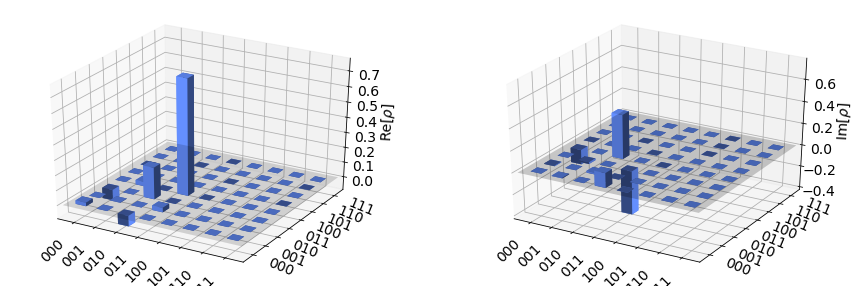

In [4]:
import c2qa
import numpy
import qiskit

qmr = c2qa.QumodeRegister(1, 2)
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circuit = c2qa.CVCircuit(qmr, qr, cr)

# qr[0] and cr[0] will init to zero
circuit.cv_initialize(0, qmr[0])

alpha = numpy.sqrt(numpy.pi)

circuit.h(qr[0])
circuit.cv_cnd_d(alpha, -alpha, qr[0], qmr[0])
circuit.cv_d(1j * alpha, qmr[0])
circuit.cv_cnd_d(-alpha, alpha, qr[0], qmr[0])
circuit.cv_d(-1j * alpha, qmr[0])
circuit.h(qr[0])
circuit.measure(qr[0], cr[0])

backend = qiskit.Aer.get_backend('statevector_simulator')
job = qiskit.execute(circuit, backend)
result = job.result()

state = result.get_statevector(circuit)
counts = result.get_counts(circuit)

print(circuit.draw("text"))
print(state)
print(counts)



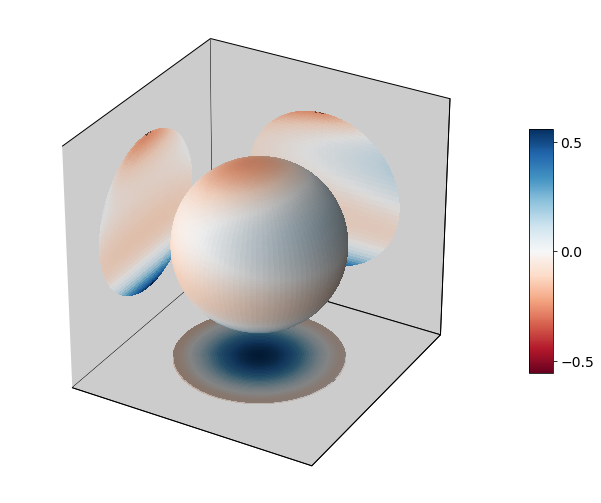

In [6]:
# Plot the results
qiskit.visualization.plot_state_city(state)

import c2qa.wigner
c2qa.wigner.plot_wigner_function(state)